In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
df = pd.read_csv("Simulation_Outputs_fr", delimiter="\t")


In [2]:
df

,TIME,Temperature_ext_C,Temperature_int_C,Temperature_op_C,QHeat_kJ_h,QCool_kJ_h,Unnamed: 6
0,1.0,0.50,20.0,20.000000,0.000000,0.0,NaN
1,2.0,0.10,19.5,19.609375,1700.066294,0.0,NaN
2,3.0,-0.75,19.0,19.295162,1347.984793,0.0,NaN
3,4.0,-1.45,19.0,19.246684,1554.008583,0.0,NaN
4,5.0,-1.95,19.0,19.203637,1723.533501,0.0,NaN
...,...,...,...,...,...,...,...
8755,8756.0,1.95,19.0,18.908874,2071.970628,0.0,NaN
8756,8757.0,1.55,19.0,18.893456,2156.951919,0.0,NaN
8757,8758.0,1.15,19.0,18.879541,2237.998779,0.0,NaN
8758,8759.0,0.70,19.0,18.866594,2321.958568,0.0,NaN


In [18]:
col_2 = df.iloc[:, 5].values
consommation = pd.DataFrame(col_2.reshape(-1, 24))
consommation2 = pd.DataFrame(col_2.reshape(-1, 24))

In [19]:
consommation

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
361,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
362,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
363,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


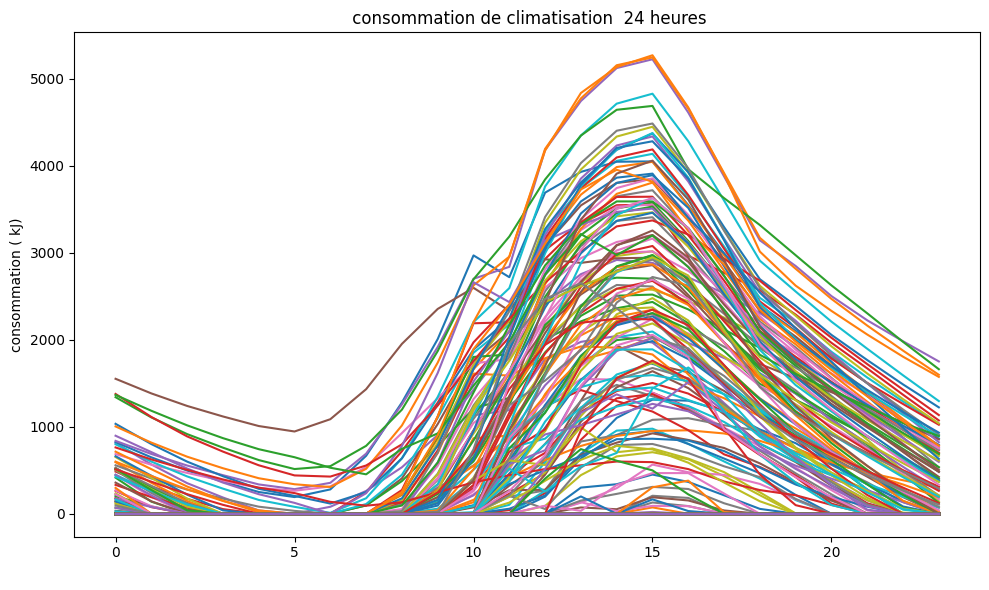

In [20]:
plt.figure(figsize=(10, 6))
for index, row in consommation.iterrows():
    plt.plot(range(0, 24), row, label=f"Jour {index}")

plt.xlabel("heures")
plt.ylabel("consommation ( kJ)")
plt.title(" consommation de climatisation  24 heures")


plt.tight_layout()
plt.show()
    

In [21]:
def apply_kmeans(n_clusters,data):
    kmeans=KMeans(n_clusters=n_clusters)
    kmeans.fit(data)
    return kmeans 

In [22]:
consommation["cool_on"] = 1



for index, row in consommation.iterrows():
    row_sum = row.drop('cool_on').sum()
    #print(row_sum) 
    if row_sum == 0.0:
        consommation.at[index, "cool_on"] = 0  
       
       
    else:
        consommation.at[index, "cool_on"] = 1
consommation2=consommation.copy()

In [23]:
consommation2

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,cool_on
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
361,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
362,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
363,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [24]:
consommation_cool = consommation[consommation["cool_on"] == 1].drop(columns=["cool_on"])

model = apply_kmeans(n_clusters=3, data=consommation_cool)
consommation.loc[consommation["cool_on"] == 1, "clusters"] = model.labels_

consommation.loc[consommation["cool_on"] == 0, "clusters"] = 3


In [25]:
def plot_clusters(consommation):
    min_val = consommation.iloc[:, :-1].min().min() 
    max_val = consommation.iloc[:, :-1].max().max()
    ylim = [min_val - 2, max_val + 2]  
    
    fig, axes = plt.subplots(2, 2, figsize=(10, 10))

    for i in range(4): 
        ax = axes[i // 2, i % 2] 
        cluster_data = consommation[consommation["clusters"] == i]
        
        for index, row in cluster_data.iterrows():
            ax.plot(range(24), row.iloc[:-1], color='gray', alpha=0.5) 
            
        center = cluster_data.iloc[:, :-1].mean(axis=0) 
        ax.plot(range(24), center, color='red', label=f'Cluster {i} ({len(cluster_data)})')

        ax.set_xlim([0, 24])  
        ax.set_ylim(ylim) 
        ax.set_title(f"Cluster {i}")
        ax.set_xlabel("Heures")
        ax.set_ylabel("Consommation (kJ/h)") 
        ax.legend()

    plt.tight_layout()
    plt.show()


In [26]:
def plot_cluster_centers_with_colors(data_normalized, cluster_assignments, y_label="Valeur"):
    cluster_centers = []
    for cluster_id in np.unique(cluster_assignments):
        cluster_data = data_normalized[cluster_assignments == cluster_id]
        cluster_center = cluster_data.iloc[:, :-1].mean().values 
        cluster_centers.append(cluster_center)

    cluster_centers = np.array(cluster_centers)

    num_clusters = len(cluster_centers)
    colors = plt.cm.get_cmap('tab10', num_clusters)  

    plt.figure(figsize=(10, 6))

    for cluster_id, cluster_center in enumerate(cluster_centers):
        plt.plot(range(24), cluster_center, color=colors(cluster_id), linewidth=3, label=f"Centre du cluster {cluster_id}")

    plt.title("Centres des Clusters")
    plt.xlabel("Heures")
    plt.ylabel(y_label)
    plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1))
    plt.grid(True)
    plt.tight_layout()

    plt.show()

***************3 clusters pour les jours où la climatisation  est allumé et 1 cluster pour les jours d'hiver***************


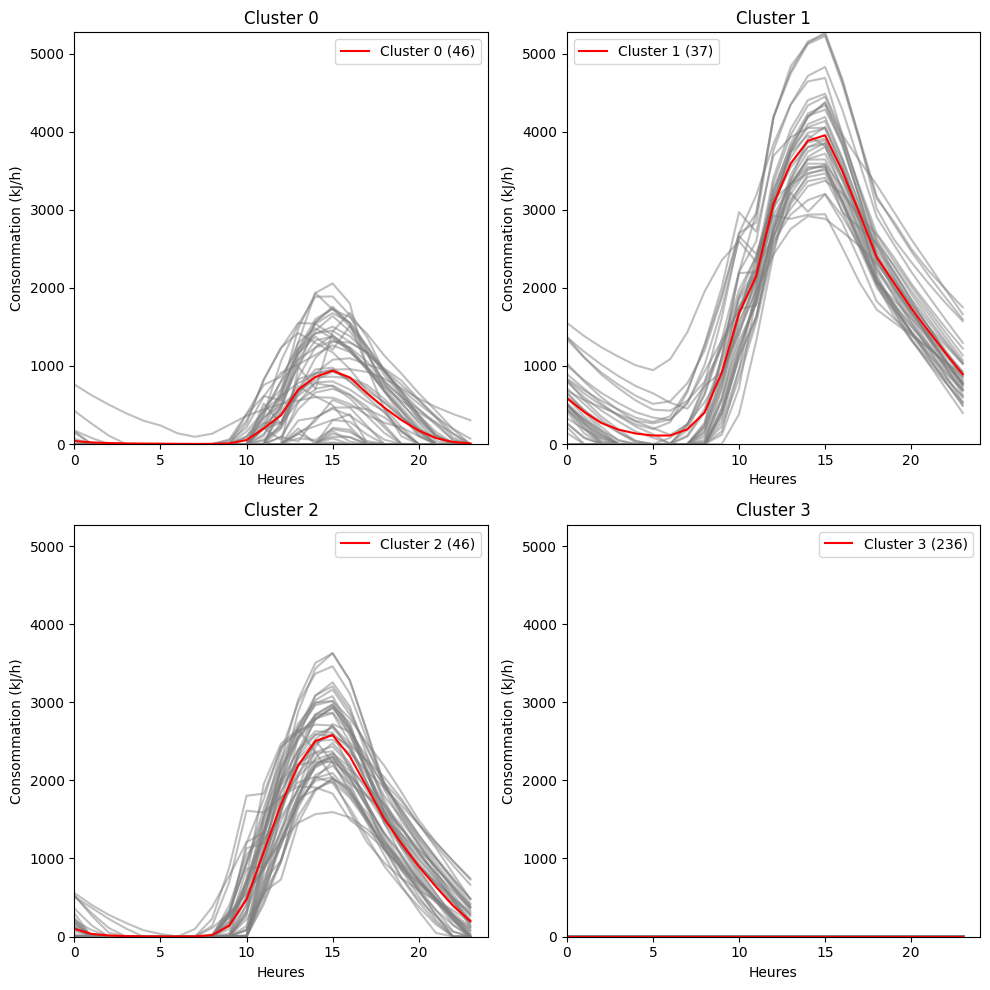

In [27]:
print("***************3 clusters pour les jours où la climatisation  est allumé et 1 cluster pour les jours d'hiver***************")
plot_clusters(consommation.drop(columns=["cool_on"]))

C:\Users\toubia\AppData\Local\Temp\ipykernel_392\409244317.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', num_clusters)


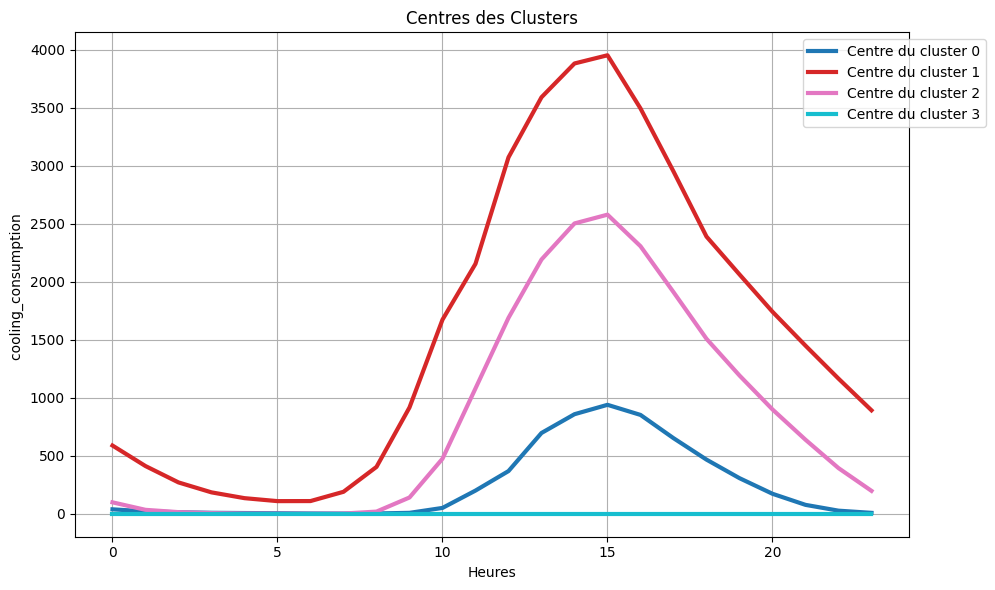

In [28]:
plot_cluster_centers_with_colors(consommation.drop(columns=["cool_on"]), consommation["clusters"], y_label="cooling_consumption ")

In [29]:
labels = consommation['clusters'] 

consommation3=consommation.drop(columns=["clusters","cool_on"])
sil_score = silhouette_score(consommation3, labels, metric='euclidean')
db_score = davies_bouldin_score(consommation3, labels)

print(f"Davies-Bouldin Index: {db_score}")
print(f"Silhouette Score: {sil_score}")

Davies-Bouldin Index: 0.7141673609792027
Silhouette Score: 0.7350071312803381


In [30]:
consommation.to_csv("consommation_cool_fr",index=False)

In [31]:
consommation_cool = consommation2[consommation2["cool_on"] == 1].drop(columns=["cool_on"])


model = apply_kmeans(n_clusters=4, data=consommation_cool)
consommation_cool["clusters"] = model.labels_



***************4 clusters pour les jours où la climatisation est allumé ***************


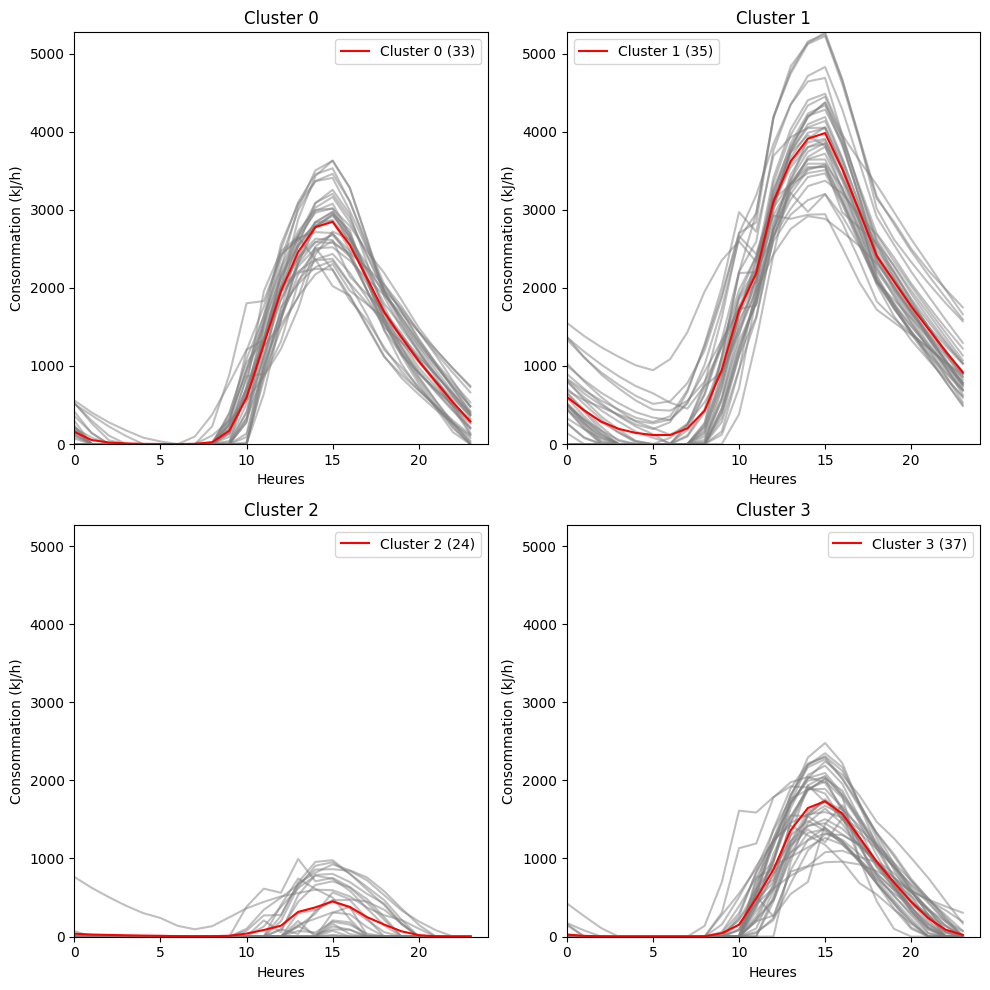

In [33]:
print("***************4 clusters pour les jours où la climatisation est allumé ***************")
plot_clusters(consommation_cool)

In [35]:
labels = consommation_cool['clusters'] 

consommation_cool2=consommation_cool.drop(columns=["clusters"])
sil_score = silhouette_score(consommation_cool2, labels, metric='euclidean')
db_score = davies_bouldin_score(consommation_cool2, labels)

print(f"Davies-Bouldin Index: {db_score}")
print(f"Silhouette Score: {sil_score}")

Davies-Bouldin Index: 0.7448729565642154
Silhouette Score: 0.4179446467264776


C:\Users\toubia\AppData\Local\Temp\ipykernel_392\409244317.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', num_clusters)


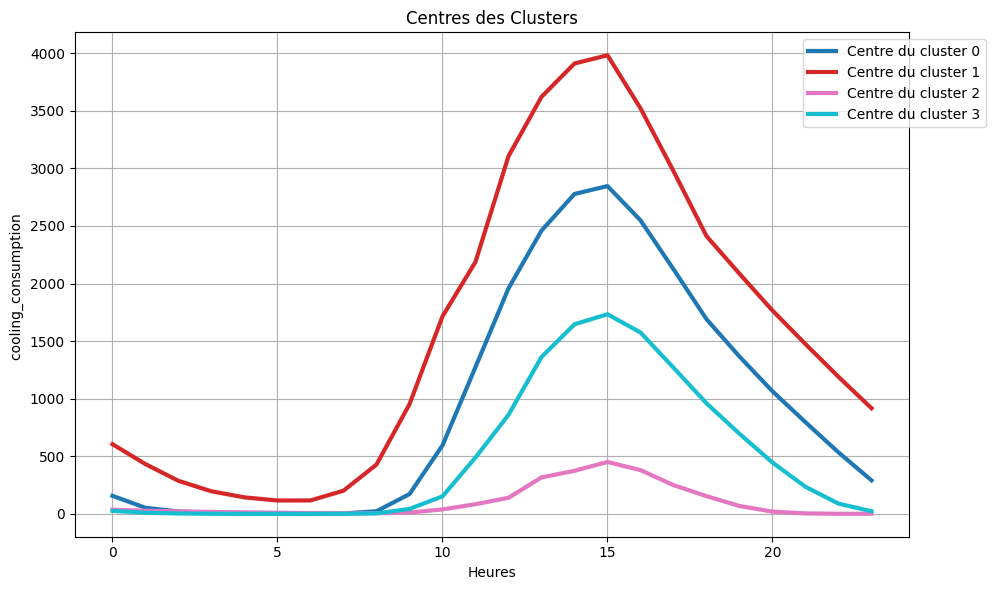

In [36]:
plot_cluster_centers_with_colors(consommation_cool, consommation_cool["clusters"], y_label="cooling_consumption ")